# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import pickle

!pip install --upgrade scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [2]:
# suppress warnings generated by the code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


# **Load the data in a csv file into a dataframe**

In [3]:
# load dataset
# dataset is available at https://archive.ics.uci.edu/ml/datasets/auto+mpg
data = "/content/mpg_raw.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.
df = pd.read_csv(data)

mpg (Miles Per Gallon): Fuel efficiency measured as the distance traveled per gallon of fuel.


---


cylinders: The number of cylinders in the engine.


---


displacement: The volume of the piston's stroke in the engine.


---


horsepower: The engine's power output.


---


weight: The weight of the car.


---


acceleration: The time it takes for the car to accelerate from 0 to 60 km/h.


---


model_year: The year of manufacture or model year.


---


origin: The country or region of the car's origin.


---


name: The name or model of the car.


---



In [4]:
# show 5 random rows from the dataset
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
263,17.7,6,231.0,165.0,3445,13.4,78,usa,buick regal sport coupe (turbo)
38,14.0,8,350.0,165.0,4209,12.0,71,usa,chevrolet impala
291,19.2,8,267.0,125.0,3605,15.0,79,usa,chevrolet malibu classic (sw)
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20


In [5]:
df['origin'] = df['origin'].replace({'usa':0,'europe':1,'japan':2})
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,1,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,0,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,0,ford ranger


In [6]:
df['name'].nunique()

305

In [7]:
df.drop(columns=['name'], inplace=True)

In [8]:
# find out the number of rows and columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [9]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [10]:
mean_horsepower = df['horsepower'].mean()
df['horsepower'].fillna(mean_horsepower, inplace=True)

In [11]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [12]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.000000


<Axes: xlabel='horsepower', ylabel='mpg'>

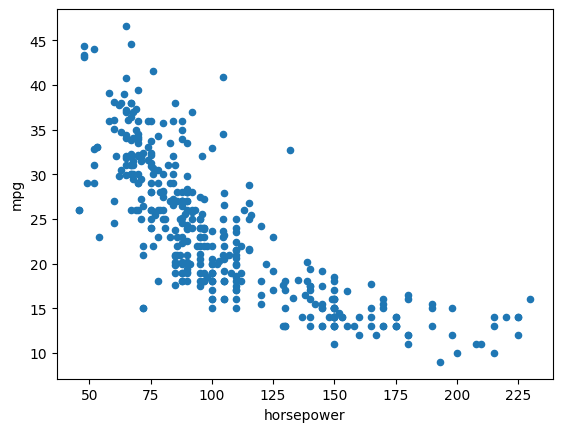

In [13]:
# create a scatter plot of horsepower versus mileage(mpg) . This will help us visualize the relationship between them
df.plot.scatter(x = "horsepower",
                y = "mpg")

<Axes: xlabel='weight', ylabel='mpg'>

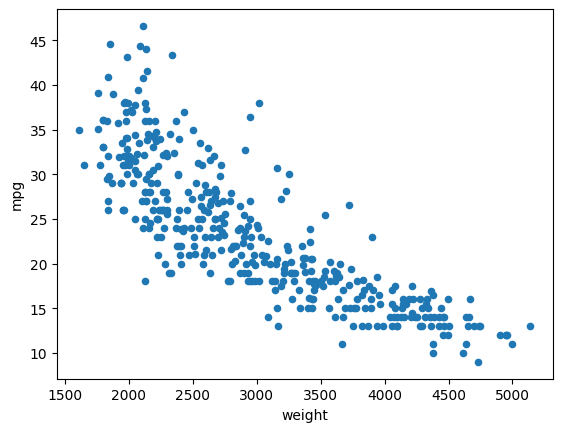

In [14]:
df.plot.scatter(x = "weight",
                y = "mpg")

<Axes: xlabel='acceleration', ylabel='mpg'>

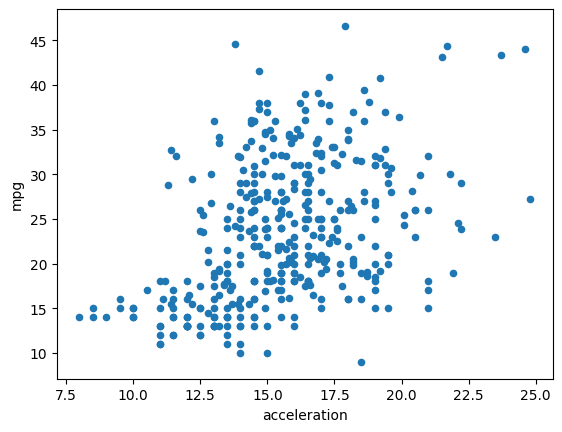

In [15]:
df.plot.scatter(x = "acceleration",
                y = "mpg")

# **Identify the target column and the data columns**

In [16]:
X = df.drop(columns='mpg')

In [17]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,0
1,8,350.0,165.0,3693,11.5,70,0
2,8,318.0,150.0,3436,11.0,70,0
3,8,304.0,150.0,3433,12.0,70,0
4,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0
394,4,97.0,52.0,2130,24.6,82,1
395,4,135.0,84.0,2295,11.6,82,0
396,4,120.0,79.0,2625,18.6,82,0


In [18]:
y = df["mpg"]

In [19]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

# **Split Training Set and Testing Set**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 7), (80, 7), (318,), (80,))

# **Multicolinearity Check**

In [22]:
# check vif

X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i)
               for i in range(X_vif.shape[1])],
              index=X_vif.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,cylinders,11.028865
2,displacement,21.633404
3,horsepower,8.545432
4,weight,10.176729
5,acceleration,2.438221
6,model_year,1.266623
7,origin,1.796472


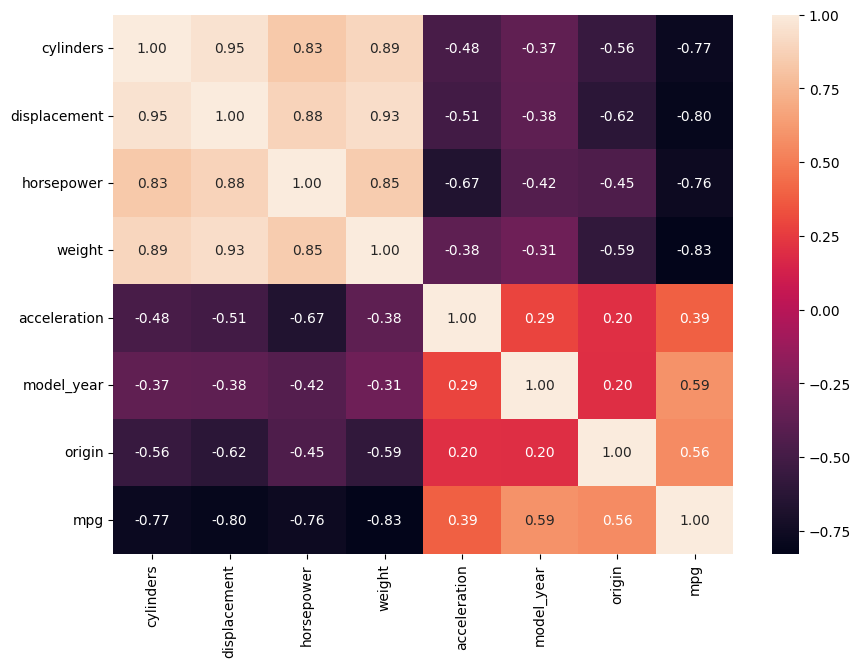

In [23]:
# heatmap correlation
data_train = pd.concat([X_train, y_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

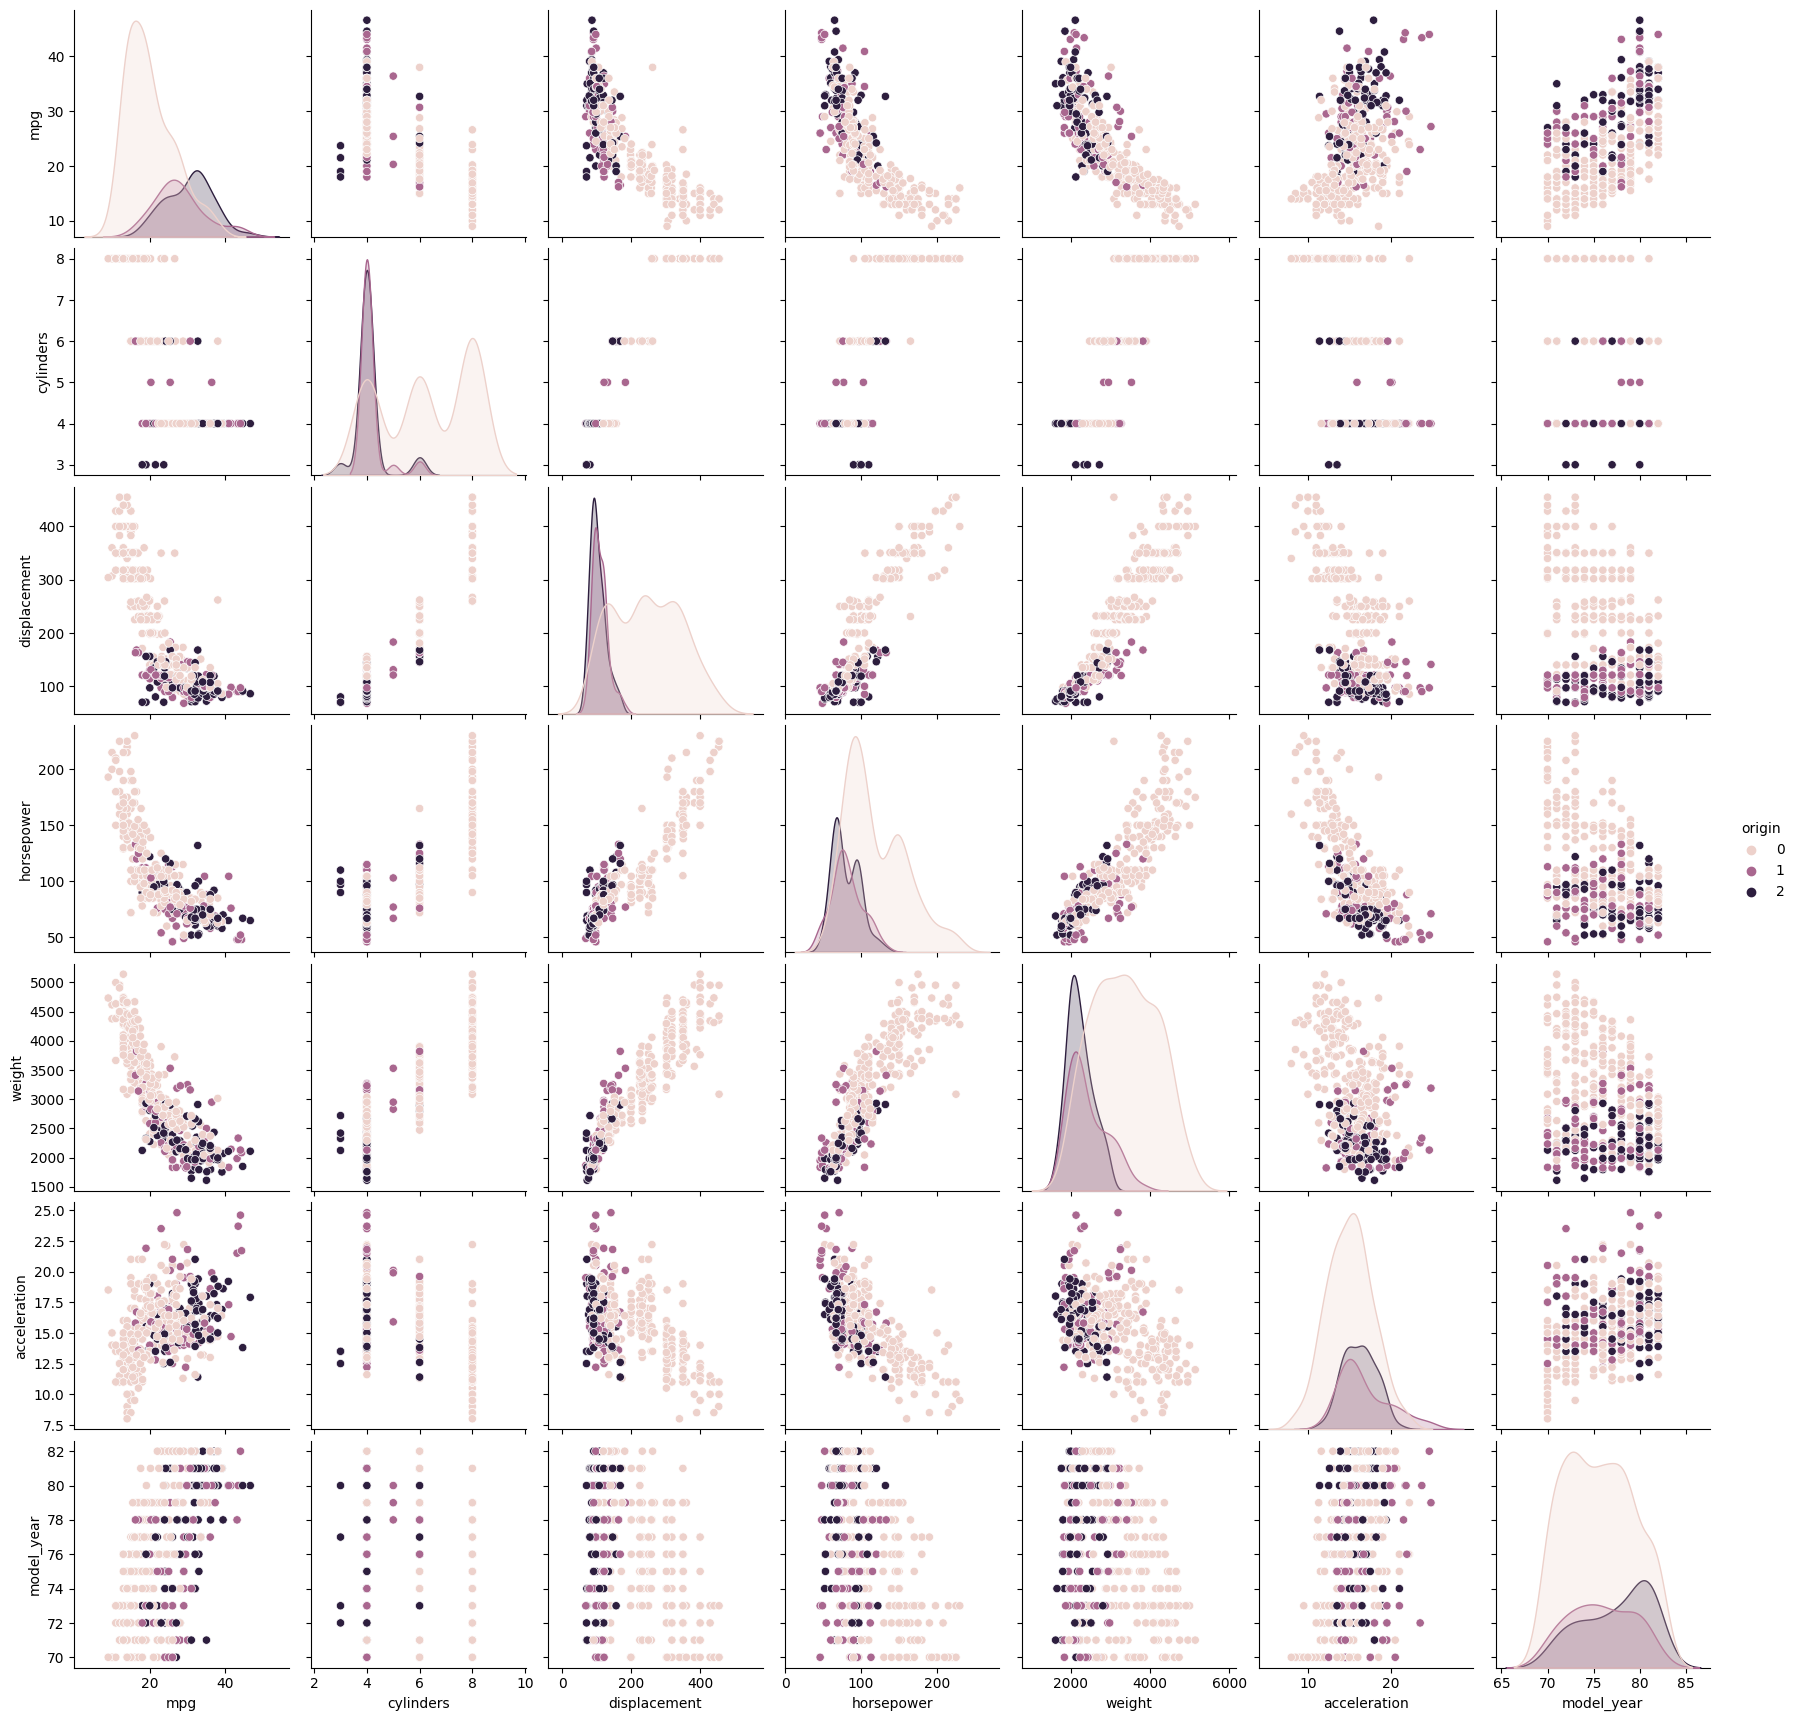

In [24]:
sns.pairplot(data=df, hue = 'origin', diag_kind='kde')

# **Build Linear Regression Model**

In [25]:
# Create a Linear Regression model
linear_model = LinearRegression()

#Fit the Grid Search to your training data
fit_reg_linreg = linear_model.fit(X_train, y_train)

y_pred_linreg = fit_reg_linreg.predict(X_test)

# Evaluate the model
MSE_linreg = mean_squared_error(y_test, y_pred_linreg)
MAE_linreg = mean_absolute_error(y_test, y_pred_linreg)
R2_linreg = r2_score(y_test, y_pred_linreg)
RMSE_linreg = np.sqrt(mean_squared_error(y_test, y_pred_linreg))
MAPE_linreg = mean_absolute_percentage_error(y_test, y_pred_linreg)

# Print the results
print ("MSE score of Linear Regression: ", MSE_linreg)
print ("MAE score of Linear Regression: ", MAE_linreg)
print ("R2 score of Linear Regression: ", R2_linreg)
print ("RMSE score of Linear Regression: ", RMSE_linreg)
print ("MAPE score of Linear Regression: ", MAPE_linreg)

MSE score of Linear Regression:  8.195452104073787
MAE score of Linear Regression:  2.253388405931761
R2 score of Linear Regression:  0.8475731044779433
RMSE score of Linear Regression:  2.8627700054446894
MAPE score of Linear Regression:  0.11428993188720135


# **Log Transformation**

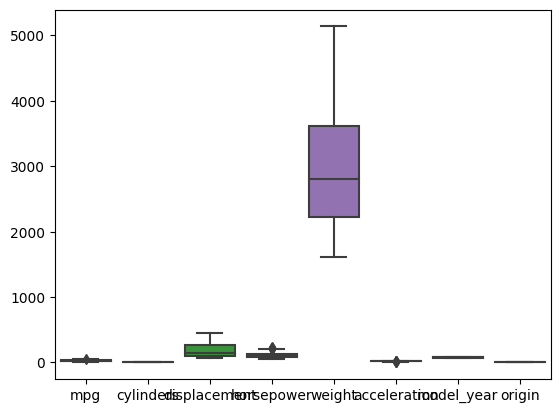

In [26]:
# Create BoxPlot using seaborn
sns.boxplot(data=df)
plt.show()

In [27]:
# Logtransformation using Numpy
df['horsepower'] = np.log(df['horsepower'])


# **Build Ridge Model**

In [28]:
# Create a Ridge regression model
ridge_model = Ridge()

# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform separate grid searches for each metric
grid_search = GridSearchCV(
        estimator=ridge_model,
        param_grid=param_grid,
        cv=5,
        verbose=1
    )

# Fit the Grid Search to your training data
fit_ridge_model = grid_search.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ridge = fit_ridge_model.predict(X_test)

# Evaluate the model
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
R2_ridge = r2_score(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
MAPE_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

# Print the results
print ("MSE score of Ridge Regression: ", MSE_ridge)
print ("MAE score of Ridge Regression: ", MAE_ridge)
print ("R2 score of Ridge Regression: ", R2_ridge)
print ("RMSE score of Ridge Regression: ", RMSE_ridge)
print ("MAPE score of Ridge Regression: ", MAPE_ridge)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
MSE score of Ridge Regression:  8.245578921140917
MAE score of Ridge Regression:  2.259432950268664
R2 score of Ridge Regression:  0.8466407977533215
RMSE score of Ridge Regression:  2.8715116090903963
MAPE score of Ridge Regression:  0.11464700345971754


# **Build Lasso Model**

In [29]:
# Create a Ridge regression model
lasso_model = Lasso()

# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform separate grid searches for each metric
grid_search = GridSearchCV(
        estimator=lasso_model,
        param_grid=param_grid,
        cv=5,
        verbose=1
    )

# Fit the Grid Search to your training data
fit_lasso_model = grid_search.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lasso = fit_lasso_model.predict(X_test)

# Evaluate the model
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
R2_lasso = r2_score(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
MAPE_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)

# Print the results
print ("MSE score of Lasso Regression: ", MSE_lasso)
print ("MAE score of Lasso Regression: ", MAE_lasso)
print ("R2 score of Lasso Regression: ", R2_lasso)
print ("RMSE score of Lasso Regression: ", RMSE_lasso)
print ("MAPE score of Lasso Regression: ", MAPE_lasso)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
MSE score of Lasso Regression:  8.421530424580096
MAE score of Lasso Regression:  2.275493374608973
R2 score of Lasso Regression:  0.8433682825715976
RMSE score of Lasso Regression:  2.9019873232976217
MAPE score of Lasso Regression:  0.1155479871598808


# **Build Gradient Boosting Regressor Model**

In [30]:
# Create a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()

# Define a range of alpha values to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform separate grid searches for each metric
grid_search = GridSearchCV(
        estimator=gbr_model,
        param_grid=param_grid,
        cv=5
    )

# Fit the Grid Search to your training data
fit_gbr_model = grid_search.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gbr = fit_gbr_model.predict(X_test)


# Evaluate the model
MSE_gbr = mean_squared_error(y_test, y_pred_gbr)
MAE_gbr = mean_absolute_error(y_test, y_pred_gbr)
R2_gbr = r2_score(y_test, y_pred_gbr)
RMSE_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
MAPE_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)

# Print the results
print ("MSE score of Gradient Boosting Regressor: ", MSE_gbr)
print ("MAE score of Gradient Boosting Regressor: ", MAE_gbr)
print ("R2 score of Gradient Boosting Regressor: ", R2_gbr)
print ("RMSE score of Gradient Boosting Regressor: ", RMSE_gbr)
print ("MAPE score of Gradient Boosting Regressor: ", MAPE_gbr)

MSE score of Gradient Boosting Regressor:  5.29819945793898
MAE score of Gradient Boosting Regressor:  1.7335592579664336
R2 score of Gradient Boosting Regressor:  0.9014589939670506
RMSE score of Gradient Boosting Regressor:  2.301781800679417
MAPE score of Gradient Boosting Regressor:  0.07996060396241725


In [31]:
# MSE of each model
print ("MSE score of Linear Regression: ", MSE_linreg)
print ("MSE score of Ridge Regression: ", MSE_ridge)
print ("MSE score of Lasso Regression: ", MSE_lasso)
print ("MSE score of Gradient Boosting Regressor: ", MSE_gbr)

# MAE of each model
print ("MAE score of Linear Regression: ", MAE_linreg)
print ("MAE score of Ridge Regression: ", MAE_ridge)
print ("MAE score of Lasso Regression: ", MAE_lasso)
print ("MAE score of Gradient Boosting Regressor: ", MAE_gbr)

# R2 of each model
print ("R2 score of Linear Regression: ", R2_linreg)
print ("R2 score of Ridge Regression: ", R2_ridge)
print ("R2 score of Lasso Regression: ", R2_lasso)
print ("R2 score of Gradient Boosting Regressor: ", R2_gbr)


# RMSE of each model
print ("RMSE score of Linear Regression: ", RMSE_linreg)
print ("RMSE score of Ridge Regression: ", RMSE_ridge)
print ("RMSE score of Lasso Regression: ", RMSE_lasso)
print ("RMSE score of Gradient Boosting Regressor: ", RMSE_gbr)


# MAPE of each model
print ("MAPE score of Linear Regression: ", MAPE_linreg)
print ("MAPE score of Ridge Regression: ", MAPE_ridge)
print ("MAPE score of Lasso Regression: ", MAPE_lasso)
print ("MAPE score of Gradient Boosting Regressor: ", MAPE_gbr)

MSE score of Linear Regression:  8.195452104073787
MSE score of Ridge Regression:  8.245578921140917
MSE score of Lasso Regression:  8.421530424580096
MSE score of Gradient Boosting Regressor:  5.29819945793898
MAE score of Linear Regression:  2.253388405931761
MAE score of Ridge Regression:  2.259432950268664
MAE score of Lasso Regression:  2.275493374608973
MAE score of Gradient Boosting Regressor:  1.7335592579664336
R2 score of Linear Regression:  0.8475731044779433
R2 score of Ridge Regression:  0.8466407977533215
R2 score of Lasso Regression:  0.8433682825715976
R2 score of Gradient Boosting Regressor:  0.9014589939670506
RMSE score of Linear Regression:  2.8627700054446894
RMSE score of Ridge Regression:  2.8715116090903963
RMSE score of Lasso Regression:  2.9019873232976217
RMSE score of Gradient Boosting Regressor:  2.301781800679417
MAPE score of Linear Regression:  0.11428993188720135
MAPE score of Ridge Regression:  0.11464700345971754
MAPE score of Lasso Regression:  0.115

Lower MSE is better: The best model is the one with the lowest MSE. This means that the model's predictions are closer to the actual values on average. A lower MSE indicates that your model is making more accurate predictions.


---



---



**The best MSE score is Gradient Boosting Regressor**

---



---



Lower MAE is Better: The best model is the one with the lowest MAE. This means that the model's predictions are, on average, closer to the actual values. Lower MAE indicates that your model is making more accurate predictions.


---



---


**The best MAE score is Gradient Boosting Regressor**


---



---



Higher R² is Better: The best models have higher R² values. A higher R² value means that a larger proportion of the variance in the target variable is explained by the model. In other words, the model accounts for more of the variation in the data, which suggests that it is a better fit.


---



---


**The best R² score is Gradient Boosting Regressor**


---



---



Lower RMSE is Better: The best models have lower RMSE values. This means that the model's predictions are, on average, closer to the actual values. Lower RMSE indicates that your model is making more accurate predictions.


---



---


**The best RMSE score is Gradient Boosting Regressor**


---



---



Lower MAPE is Better: The best models have lower MAPE values. This means that the model's prediction are closer to the actual values. Lower MAPE indicates that your model is making more accurate predictions.


---



---
**The best MAPE score is Gradient Boosting Regressor**

---



---




In [32]:
# Menyimpan model terbaik dengan pickle
pklname = "best_model_gbr.pkl"

with open(pklname, 'wb') as file:
    pickle.dump(fit_gbr_model, file)